In [2]:
import matplotlib.pyplot as plt
import pandas as pd


In [3]:
df = pd.read_csv('count_log_tmp.csv')
df.set_index('0')

,0.1,0.2
0,,
1,0,0
2,0,0
3,0,0
4,0,0
5,0,0
...,...,...
18928,4,66
18929,3,66
18930,3,65


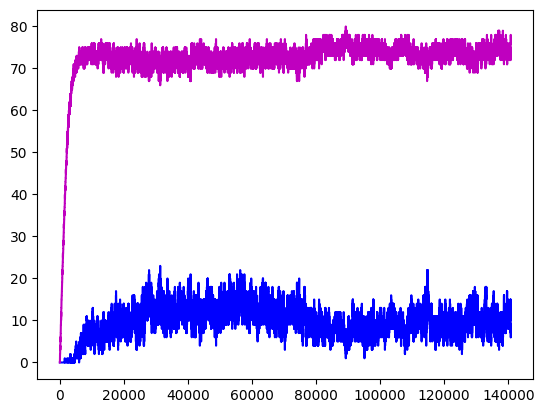

In [6]:
df_2 = pd.read_csv('count_log_tmp_5.csv')
plt.plot(df_2['cells'],'blue')
plt.plot(df_2['spores'],'m')

In [7]:
df_2.describe()

,time,cells,spores
count,140786.000000,140786.000000,140786.000000
mean,70392.500000,9.789276,72.322617
std,40641.561836,3.728038,6.338585
min,0.000000,0.000000,0.000000
25%,35196.250000,8.000000,72.000000
50%,70392.500000,10.000000,73.000000
75%,105588.750000,12.000000,74.000000
max,140785.000000,23.000000,80.000000


In [8]:
df_3 = pd.read_csv('all_particles_1.csv', names=["time", "Magenta", "Blue", "Yellow", "Brown", "Green"])

In [9]:
df_3 = df_3[1:]

for col in df_3.columns:
    df_3[col] = df_3[col].astype(int)

In [10]:
df_3["Cells"] = df_3['Blue'] / 48
df_3['Spores'] = df_3['Magenta'] / 15

In [150]:
df_3.describe()

,time,Magenta,Blue,Yellow,Brown,Green,Cells,Spores
count,104145.00000,104145.000000,104145.000000,104145.000000,104145.000000,104145.000000,104145.000000,104145.000000
mean,52072.00000,208.814720,2433.397792,32.387825,77.984877,2247.414787,50.695787,13.920981
std,30064.21623,99.182686,350.221052,9.735111,22.810995,412.817297,7.296272,6.612179
min,0.00000,0.000000,0.000000,0.000000,0.000000,2037.000000,0.000000,0.000000
25%,26036.00000,142.000000,2447.000000,27.000000,65.000000,2117.000000,50.979167,9.466667
50%,52072.00000,218.000000,2507.000000,33.000000,78.000000,2139.000000,52.229167,14.533333
75%,78108.00000,283.000000,2564.000000,39.000000,92.000000,2167.000000,53.416667,18.866667
max,104144.00000,518.000000,2765.000000,74.000000,186.000000,4957.000000,57.604167,34.533333


In [53]:
import numpy as np
from statsmodels.tsa.api import SimpleExpSmoothing, ExponentialSmoothing

# Todo:
# ExponentialSmoothing
# exp_model1 = SimpleExpSmoothing(df_3["Magenta"]).fit(.1, optimized=False)
# fit1 = exp_model1.forecast(20000)
# plt.plot(fit1 , 'yellow')

In [17]:
N = 100

for i in range(0,df_3.shape[0]-N):
    df_3.loc[df_3.index[i+N],'Magenta_SMA_N'] = np.average([df_3.iloc[i + n,7] for n in range(0,N)])


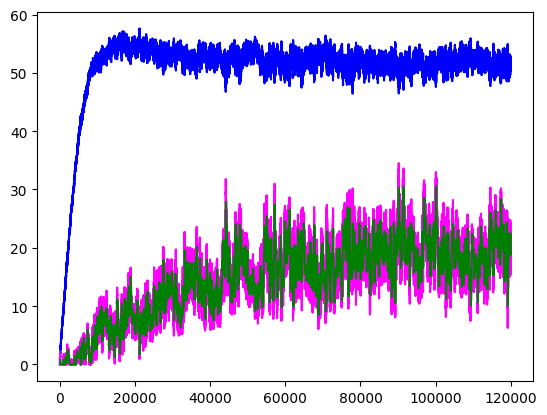

In [52]:
plt.plot(df_3["Cells"],'blue')
plt.plot(df_3["Spores"], 'magenta')
plt.plot(df_3["Magenta_SMA_N"], 'green')